In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [71]:
data = pd.read_csv('filled_data.csv',index_col=0)

In [72]:
data.rename(columns={'0':'price_per_square','1':'squares','2':'max_floor','3':'latitude','4':'longitude','5':'Nevskii prospekt',
                     '6':'parkings_1km','7':'rent_per_m'},inplace=True)

In [73]:
data.head()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,8
5,187500.0,4.0,1.0,30.463461,59.895551,15.32,36.0,20078.0,1.0
9,136364.0,4.4,1.0,30.342404,59.905357,2.30,77.0,20078.0,1.0
18,291667.0,7.2,5.0,30.377268,59.933068,5.56,55.0,96430.0,1.0
22,33750.0,8.0,12.0,30.378678,59.855331,7.17,89.0,20500.0,1.0
36,350000.0,10.0,20.0,30.215787,60.003327,12.78,95.0,43200.0,1.0


In [74]:
data = data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]

In [75]:
data = data[data['price_per_square']>= 30000.0]

In [76]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# Строим Лес

In [13]:
df_1 = data.copy()

In [14]:
X = df_1[['squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]
y = df_1['price_per_square']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 999)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9047478075873617

In [20]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

27477.392326647652
20137.61929550321
0.10744560358571152


In [21]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.3356517751098155

75392.31773101527
56014.009820512816
0.34258266260481857


# Настроим параметры

In [23]:
from sklearn.model_selection import GridSearchCV

## Defining param grid 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
}

## Creating a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=999)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X, y)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

KeyboardInterrupt: 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 999)

from sklearn.ensemble import RandomForestRegressor

rfc1 = RandomForestRegressor(n_estimators=200,max_depth=22)
rfc1.fit(X_train, y_train)
display(rfc1.score(X_train, y_train))

0.9146925990994549

In [25]:
predictions3 = rfc1.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions3))
print(rmse)
print(mean_absolute_error(y_train, predictions3))
print(mean_absolute_percentage_error(y_train, predictions3))

26375.373273884732
19491.756513674092
0.10763435007067088


In [26]:
predictions4 = rfc1.predict(X_test)
#Calculate the root mean squared error
display(rfc1.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions4))
print(rmse)
print(mean_absolute_error(y_test, predictions4))
print(mean_absolute_percentage_error(y_test, predictions4))

0.3611281619418173

72659.8013044413
53613.69850035612
0.3070864344985806


In [27]:
predictions5 = rfc1.predict(X)
#Calculate the root mean squared error
display(rfc1.score(X, y))
rmse = np.sqrt(mean_squared_error(y, predictions5))
print(rmse)
print(mean_absolute_error(y, predictions5))
print(mean_absolute_percentage_error(y, predictions5))

0.7469125565432586

45525.39397237939
29741.479780533653
0.16754678621461294


# Интерпретация параметров

In [28]:
feature_importances = pd.DataFrame(rfc1.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
max_floor           0.221234
longitude           0.195265
Nevskii prospekt    0.134382
squares             0.123774
parkings_1km        0.114263
latitude            0.110043
rent_per_m          0.101038


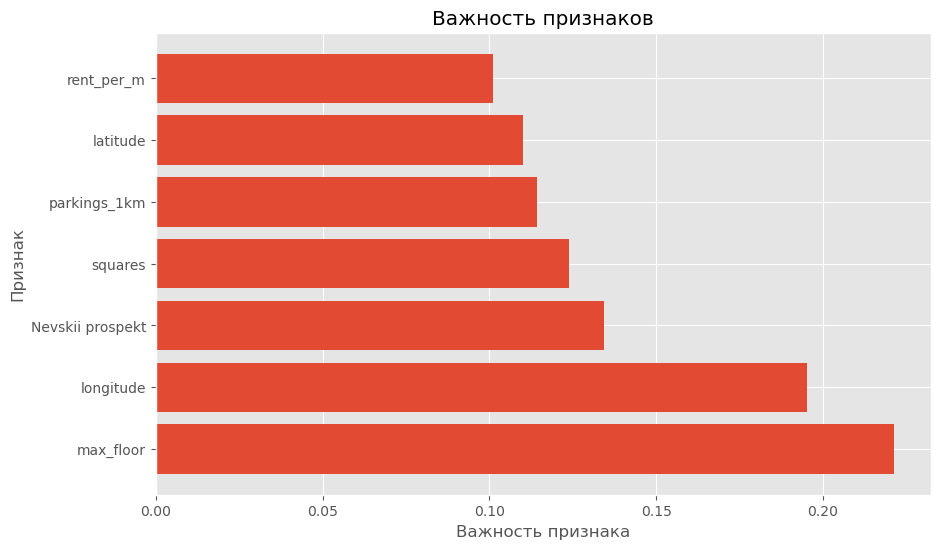

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

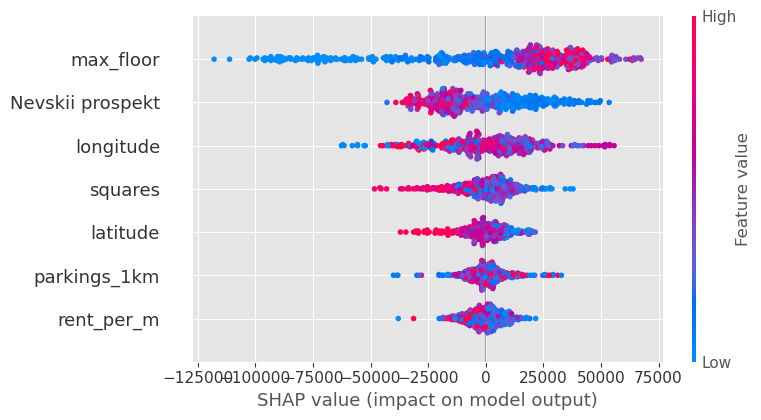

In [30]:
import shap

explainer = shap.Explainer(rfc1)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

# Добавление популяции по районам

Мы берем фиктивные переменные по районам, затем согласно ним присоединяем в столбец популяции данные по соответствующему району

In [65]:
rk = pd.read_csv(r'C:\Users\pelik\python\diplomopis\spb_geo\boundary-polygon-land-lvl5.csv')

In [66]:
rk.columns

Index(['WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato'], dtype='object')

In [67]:
rk = rk.rename(columns={'WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato':'polygon'})

In [34]:
rk.iat[3,0]

'POLYGON ((30.3379519 59.9209349,30.3377953 59.9210607,30.3371941 59.9215543,30.3371123 59.9216252,30.3365553 59.9220907,30.3364728 59.9221597,30.3363696 59.9222493,30.3361621 59.9224251,30.336107 59.9224643,30.3352309 59.9233162,30.3357858 59.9235368,30.3304534 59.9260735,30.3300187 59.9262994,30.32703 59.9251507,30.3218708 59.9285986,30.318983 59.93053,30.3178175 59.9313099,30.3153107 59.9329953,30.3118605 59.9353013,30.3117762 59.9353581,30.311539 59.9355176,30.3114609 59.9355701,30.3114179 59.935599,30.3112298 59.9357255,30.3109312 59.9359263,30.3108416 59.9359866,30.3105593 59.9361765,30.3104029 59.9362817,30.3103119 59.9363429,30.3102313 59.9363971,30.3101295 59.9364655,30.3103024 59.9366458,30.3123914 59.9373876,30.3124162 59.9374581,30.3126331 59.9379477,30.3126379 59.9380088,30.3126288 59.9380613,30.3126137 59.9381018,30.3125887 59.9381449,30.3125619 59.9381783,30.3125203 59.9382183,30.3124762 59.9382558,30.3124315 59.9382896,30.309989 59.9398884,30.3090786 59.9405117,30.30827

In [68]:
districts = []

for i in range (18):
    string = rk.iat[i,0]

    # Разделение строки по табуляции и выбор английского значения
    english_value = string.split('\t')[2]

    # Удаление лишних пробелов и символов переноса строки
    english_value = english_value.strip()
    english_value = english_value.replace(' District','')

    # Вывод результата
    districts.append(english_value)


In [77]:
districts

['Pushkinsky',
 'Kolpinsky',
 'Primorsky',
 'Tsentralny',
 'Kalininsky',
 'Krasnogvardeysky',
 'Admiralteysky',
 'Vyborgsky',
 'Frunzensky',
 'Nevsky',
 'Petrogradsky',
 'Vasileostrovsky',
 'Krasnoselsky',
 'Kirovsky',
 'Moskovsky',
 'Kronshtadtsky',
 'Kurortny',
 'Petrodvortsovy']

In [78]:
data[districts] = 0

In [79]:
len(data)

779

In [80]:
from shapely.geometry import Point, Polygon
from shapely.wkt import loads

In [81]:
rk['polygon'] = rk['polygon'].apply(loads)

In [82]:
def point_in_polygon(point):
    for polygon in range(len(rk['polygon'])):
        if rk['polygon'].iloc[polygon].contains(point):
            data[districts[polygon]][i] = 1
    return False

In [83]:
global i
for i in range(779):
        point_in_polygon(Point(data.iat[i,3],data.iat[i,4]))


In [84]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Kolpinsky,...,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,Kronshtadtsky,Kurortny,Petrodvortsovy
5,187500.0,4.0,1.0,30.463461,59.895551,15.32,36.0,20078.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,136364.0,4.4,1.0,30.342404,59.905357,2.30,77.0,20078.0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,291667.0,7.2,5.0,30.377268,59.933068,5.56,55.0,96430.0,0,0,...,0,1,0,0,0,0,0,0,0,0
22,33750.0,8.0,12.0,30.378678,59.855331,7.17,89.0,20500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
36,350000.0,10.0,20.0,30.215787,60.003327,12.78,95.0,43200.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,256131.0,199.0,5.0,30.319848,59.855304,4.18,55.0,421284.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,253080.0,199.4,5.0,30.319848,59.855304,4.18,55.0,421284.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1738,110000.0,200.0,5.0,30.112121,59.846201,24.18,29.0,409986.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1740,360000.0,200.0,5.0,30.345773,59.924984,2.13,60.0,490186.8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
distr_df = pd.read_csv(r'C:\Users\pelik\python\diplomopis\districts\districts.csv', sep = ' ')
distr_df

,district,population
0,Admiralteysky,155981
1,Vasileostrovsky,206680
2,Vyborgsky,541590
3,Kalininsky,536794
4,Kirovsky,335774
5,Kolpinsky,186169
6,Krasnogvardeysky,366971
7,Krasnoselsky,431546
8,Kronshtadtsky,44414
9,Kurortny,83491


In [86]:
data[districts].sum()

Pushkinsky          10
Kolpinsky            0
Primorsky           39
Tsentralny          36
Kalininsky          17
Krasnogvardeysky    22
Admiralteysky       38
Vyborgsky           31
Frunzensky          19
Nevsky              22
Petrogradsky        16
Vasileostrovsky     32
Krasnoselsky        23
Kirovsky             3
Moskovsky           26
Kronshtadtsky        0
Kurortny             0
Petrodvortsovy       0
dtype: int64

In [89]:
rem_cols = ['Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [90]:
data = data.drop(rem_cols, axis=1)

In [91]:
data = data[data['Pushkinsky'] == 0]
data = data[data['Kirovsky'] == 0]

In [93]:
len(data)

766

In [94]:
rem_cols = ['Kirovsky','Pushkinsky']

In [95]:
data = data.drop(rem_cols, axis=1)

In [96]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Kalininsky', 'Krasnogvardeysky', 'Admiralteysky',
       'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky', 'Vasileostrovsky',
       'Krasnoselsky', 'Moskovsky'],
      dtype='object')

In [119]:
rem_rows = ['Kirovsky','Pushkinsky','Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [122]:
distr_df = distr_df[~distr_df.district.isin(rem_rows)]

In [143]:
data['population'] = 0

In [145]:

for i in range(len(distr_df)):
    print(distr_df.iat[i,0])
    data.loc[data[distr_df.iat[i, 0]] == 0, 'population'] = distr_df.iat[i,1]

Admiralteysky
Vasileostrovsky
Vyborgsky
Kalininsky
Krasnogvardeysky
Krasnoselsky
Moskovsky
Nevsky
Petrogradsky
Primorsky
Frunzensky
Tsentralny


In [146]:
data.population.describe()

count       766.000000
mean     210679.906005
std       45177.009113
min      200654.000000
25%      200654.000000
50%      200654.000000
75%      200654.000000
max      413983.000000
Name: population, dtype: float64

In [147]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Kalininsky', 'Krasnogvardeysky', 'Admiralteysky',
       'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky', 'Vasileostrovsky',
       'Krasnoselsky', 'Moskovsky', 'population'],
      dtype='object')

In [207]:
df_2 = data.copy()

In [208]:
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population']]
y = df_2['price_per_square']

In [209]:
# Load libraries
import os
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [211]:
# Split-out validation dataset
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population']]
Y = df_2['price_per_square']
validation_size = 0.50
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [212]:
# Test options and evaluation metric
num_folds = 2
seed = 999
scoring = 'neg_mean_absolute_percentage_error'

In [213]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.423590 (0.022724)
LASSO: -0.423584 (0.022730)
EN: -0.426013 (0.027527)
KNN: -0.462981 (0.022380)
CART: -0.455329 (0.013883)
SVR: -0.447066 (0.018845)


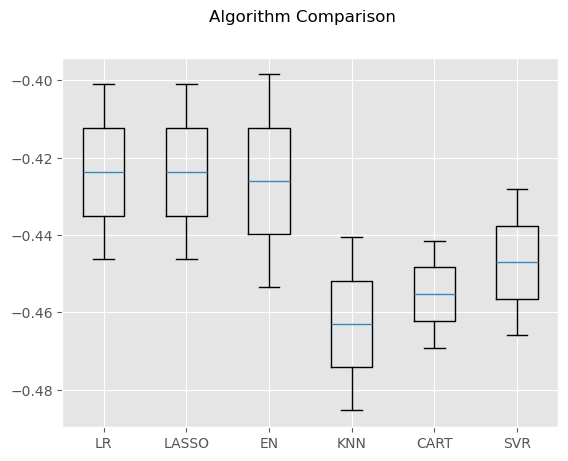

In [214]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [215]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.423590 (0.022724)
ScaledLASSO: -0.423591 (0.022725)
ScaledEN: -0.429957 (0.028421)
ScaledKNN: -0.429674 (0.013263)
ScaledCART: -0.452921 (0.046942)
ScaledSVR: -0.447057 (0.018839)


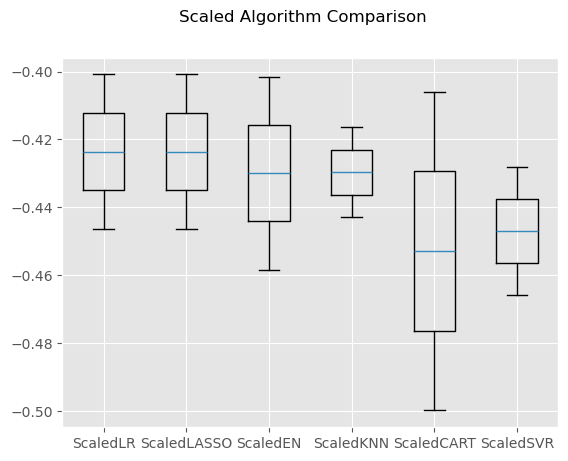

In [216]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [217]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.430505 using {'n_neighbors': 7}
-0.474368 (0.013383) with: {'n_neighbors': 1}
-0.435657 (0.009101) with: {'n_neighbors': 3}
-0.433974 (0.014728) with: {'n_neighbors': 5}
-0.430505 (0.021065) with: {'n_neighbors': 7}
-0.431275 (0.023426) with: {'n_neighbors': 9}
-0.435296 (0.026649) with: {'n_neighbors': 11}
-0.436738 (0.030276) with: {'n_neighbors': 13}
-0.439920 (0.031562) with: {'n_neighbors': 15}
-0.441034 (0.027575) with: {'n_neighbors': 17}
-0.443446 (0.030844) with: {'n_neighbors': 19}
-0.443564 (0.028629) with: {'n_neighbors': 21}


### 7. Ensemble Methods

In [218]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.390916 (0.029531)
ScaledGBM: -0.386607 (0.029040)
ScaledRF: -0.408520 (0.029414)
ScaledET: -0.388547 (0.038352)


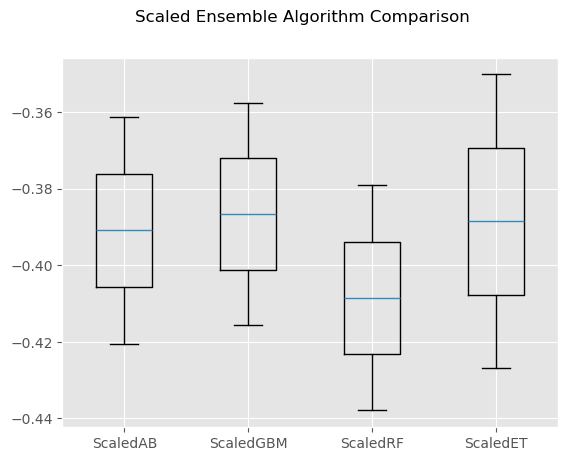

In [219]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [220]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [221]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.384433 using {'n_estimators': 50}
-0.384433 (0.020570) with: {'n_estimators': 50}
-0.385368 (0.028187) with: {'n_estimators': 100}
-0.386443 (0.031653) with: {'n_estimators': 150}
-0.387915 (0.033137) with: {'n_estimators': 200}
-0.389007 (0.032891) with: {'n_estimators': 250}
-0.388853 (0.033707) with: {'n_estimators': 300}
-0.390414 (0.033752) with: {'n_estimators': 350}
-0.391365 (0.033693) with: {'n_estimators': 400}


### 8. Finalize Model

In [222]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=250, random_state=999)

In [223]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))
print(mean_absolute_error(Y_validation, predictions))
print(mean_absolute_percentage_error(Y_validation, predictions))

5656625287.972309
57029.75128688626
0.2966723723860618


In [227]:
dataset = data[['price_per_square','squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population']]

In [228]:
dataset.to_csv('data_with_population.csv', encoding='utf-8')